In [118]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
f = open("Absenteeism_at_work.xls")

In [204]:
#Reading the Dataset:
raw_data = pd.read_excel('Absenteeism_at_work.xls')
print(raw_data.shape) #checking no of rows and columns in the dataset.
raw_data.head()

(740, 21)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


In [206]:
#Taking a copy of Dataset:
df = raw_data.copy()

In [207]:
#using Pd.options display max columns to check entire rows and columns in dataset.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [208]:
#Checking the info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [209]:
#All features are in neumerical features thats great!

In [210]:
#Drop 'ID':
df.drop(['ID'], axis =1,inplace=True)

In [211]:
#cheking Duplicate columns:
df.duplicated().sum()

34

                                 Total Missing Value
Reason for absence                                 0
Month of absence                                   0
Day of the week                                    0
Seasons                                            0
Transportation expense                             0
Distance from Residence to Work                    0
Service time                                       0
Age                                                0
Work load Average/day                              0
Hit target                                         0
Disciplinary failure                               0
Education                                          0
Son                                                0
Social drinker                                     0
Social smoker                                      0
Pet                                                0
Weight                                             0
Height                                        

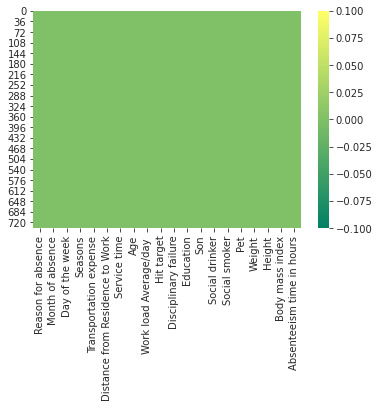

In [212]:
#Checking the null values in the dataset:
missing_value = pd.DataFrame(df.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
sns.heatmap(df.isnull(),cmap='summer')

In [213]:
#Wow no missing values,its an well balanced dataset thats great!

In [214]:
#'Reason for Absence' Column lets work out in it.
#'Unknown'.
#'Certain infectious and parasitic diseases'.
#'Neoplasms'.
#'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism'.
#'Endocrine, nutritional and metabolic diseases'.
#'Mental and behavioural disorders'.
#'Diseases of the nervous system'.
#'Diseases of the eye and adnexa'.
#'Diseases of the ear and mastoid process'.
#'Diseases of the circulatory system'.
#'Diseases of the respiratory system'.
#'Diseases of the digestive system'.
#'Diseases of the skin and subcutaneous tissue'.
#'Diseases of the musculoskeletal system and connective tissue'.
#'Diseases of the genitourinary system'.
#'Pregnancy, childbirth and the puerperium'.
#'Certain conditions originating in the perinatal period'.
#'Congenital malformations, deformations and chromosomal abnormalities'.
#'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified'.
#'Injury, poisoning and certain other consequences of external causes'.
#'External causes of morbidity and mortality'.
#'Factors influencing health status and contact with health services'.
#'Patient follow-up'.
#'Medical consultation'.
#'Blood donation'.
#'Laboratory examination'.
#'Unjustified absence'.
#'Physiotherapy'.
#'Dental consultation.

In [215]:
df['Reason for absence'].min()

0

In [216]:
df['Reason for absence'].max()

28

In [217]:
#Ok there are 29 reason for absence which all are mentioned above so lets rearrange all this data together:
#For this we need to convert the reason for absence in dummy column:
#After that we can create four categories of that.

In [218]:
#Checking the unique value:
df['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [219]:
len(df['Reason for absence'].unique())

28

In [220]:
#we can see that one data is absent lets chek which one:
sorted(df['Reason for absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [134]:
#We can see that 20 is absent:

In [221]:
#Lets use get dummies method:
reason_columns = pd.get_dummies(df['Reason for absence'])

In [222]:
#We are summing up and saving the data in check column to check whether theres any null values or not:
reason_columns['check'] = reason_columns.sum(axis=1)

In [223]:
reason_columns['check'].sum(axis=0)

740

In [224]:
reason_columns['check'].unique()

array([1])

In [225]:
#We dont need 0 reason of absence so we are going to drop it
reason_columns = pd.get_dummies(df['Reason for absence'], drop_first = True)

In [226]:
#Lets drop the Reson for absence columns:
df = df.drop(['Reason for absence'], axis = 1)

In [227]:
#Checking the Columns:
column = list(df.columns)
print(column)

['Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']


In [228]:
#Summing of the dummies values into four categories:
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)

In [229]:
#Using the concat Method to to combine the reason column and dataset:
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)

In [230]:
df.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,0,1,2,3
0,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4,0,0,0,1
1,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0,0,0,0,0
2,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2,0,0,0,1
3,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4,1,0,0,0
4,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2,0,0,0,1


In [231]:
#Rearranging the Columns:
column_names = ['Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

In [232]:
df.columns = column_names

In [233]:
df.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason_1,Reason_2,Reason_3,Reason_4
0,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4,0,0,0,1
1,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0,0,0,0,0
2,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2,0,0,0,1
3,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4,1,0,0,0
4,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2,0,0,0,1


In [234]:
#Reordering Columns:
column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

In [235]:
df.columns = column_names_reordered

In [236]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4,0,0,0,1
1,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0,0,0,0,0
2,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2,0,0,0,1
3,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4,1,0,0,0
4,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2,0,0,0,1


In [237]:
#checking the value count of some features:
print(df['Education'].value_counts())

0    460
1    138
2     96
4     32
8      8
5      6
Name: Education, dtype: int64


In [238]:
#Checking value count for target variable:
df['Absenteeism time in hours'].value_counts()

1    435
0    305
Name: Absenteeism time in hours, dtype: int64

In [239]:
#Statistical Analysis:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324,0.255405,0.008108,0.090541,0.587838
std,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998,0.436384,0.089740,0.287149,0.492557
min,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000,1.000000,0.000000,0.000000,1.000000
max,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000,1.000000,1.000000,1.000000,1.000000


In [240]:
#its looks an balance dataset:
#In pet column theres a huge difference between max and 75% possibility of outliers:


In [241]:
#Exploratory Data Analysis

#Univarite Analysis

#Multivariate Analysis

#Bivariate Analysis

#Here we check the relationship between different independant and dependant variable.

0    460
1    138
2     96
4     32
8      8
5      6
Name: Education, dtype: int64


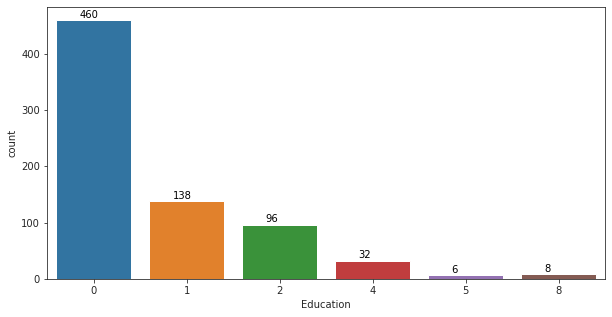

In [ ]:
#Univariate Analysis:
#Checking Count of Education Column:
sns.set_style('ticks')
plt.figure(figsize=(10,5))
ax = sns.countplot(df['Education'])
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

print(df['Education'].value_counts())

1    435
0    305
Name: Absenteeism time in hours, dtype: int64

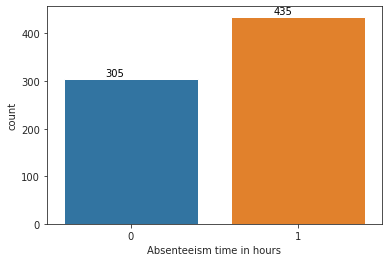

In [ ]:
#Univariate Analysis:
#Checking Count of Target Varibale:
sns.set_style('ticks')
ax = sns.countplot(df['Absenteeism time in hours'])
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

df['Absenteeism time in hours'].value_counts()

Absenteeism time in hours,0,1
Education,,
0,0.415217,0.584783
1,0.427536,0.572464
2,0.343750,0.656250
4,0.375000,0.625000
5,0.666667,0.333333


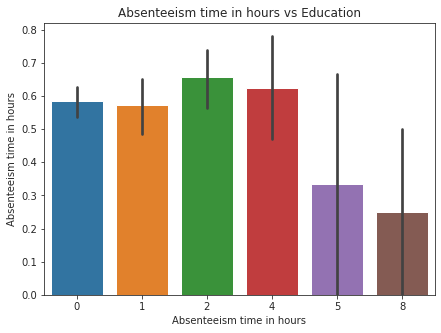

In [187]:
#Bivariate Analysis:
#Checking relationship between Absenteeism time in hours vs Education:
plt.figure(figsize=(7,5))
sns.barplot(x='Education',y='Absenteeism time in hours',data=df)
plt.xlabel('Absenteeism time in hours')
plt.ylabel('Absenteeism time in hours')
plt.title('Absenteeism time in hours vs Education')
pd.crosstab(index=df['Education'],columns=df['Absenteeism time in hours'],normalize='index').head()

Absenteeism time in hours,0,1
Social drinker,,
163,0.666667,0.333333
165,0.333333,0.666667
167,0.382353,0.617647
168,0.416667,0.583333
169,0.336842,0.663158


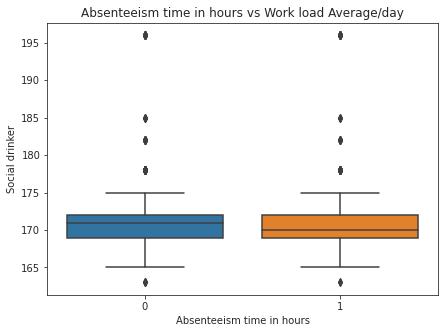

In [190]:
#Bivariate Analysis:
#Checking relationship between Absenteeism time in hours vs Education:
plt.figure(figsize=(7,5))
sns.boxplot(x='Absenteeism time in hours',y='Social drinker',data=df)
plt.xlabel('Absenteeism time in hours')
plt.ylabel('Social drinker')
plt.title('Absenteeism time in hours vs Work load Average/day')
pd.crosstab(index=df['Social drinker'],columns=df['Absenteeism time in hours'],normalize='index').head()

Absenteeism time in hours,0,1
Social smoker,,
19,0.413043,0.586957
21,0.545455,0.454545
22,0.628571,0.371429
23,0.453333,0.546667
24,0.360465,0.639535


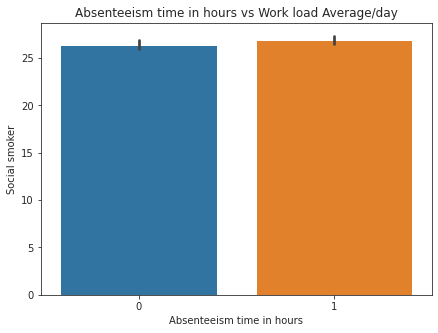

In [193]:
#Bivariate Analysis:
#Checking relationship between Absenteeism time in hours vs Education:
plt.figure(figsize=(7,5))
sns.barplot(x='Absenteeism time in hours',y='Social smoker',data=df)
plt.xlabel('Absenteeism time in hours')
plt.ylabel('Social smoker')
plt.title('Absenteeism time in hours vs Work load Average/day')
pd.crosstab(index=df['Social smoker'],columns=df['Absenteeism time in hours'],normalize='index').head()

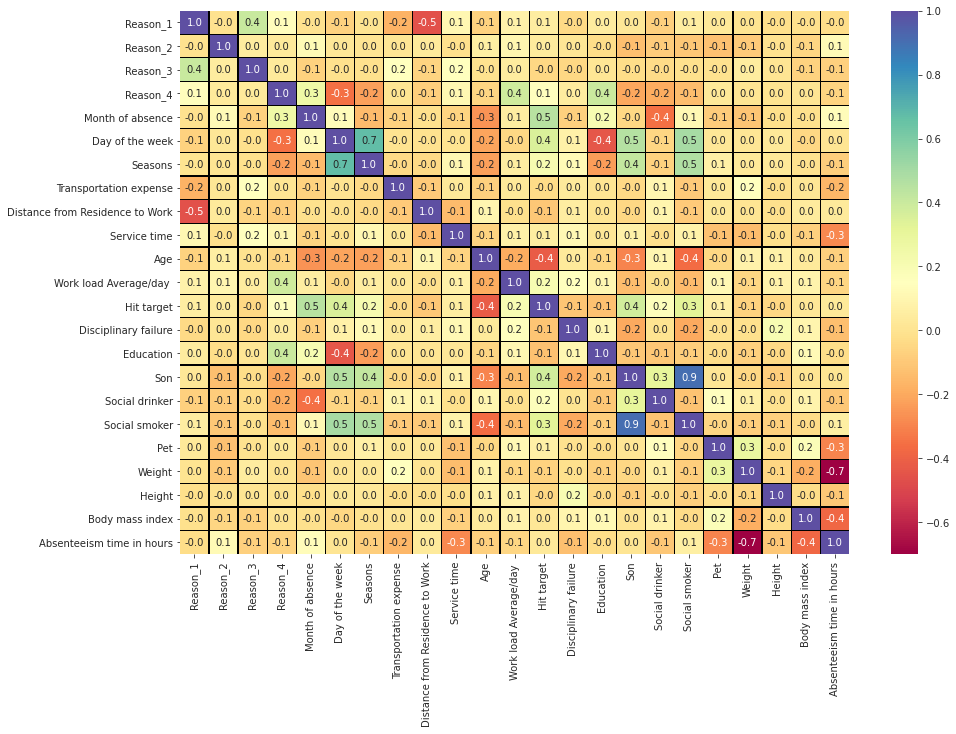

In [194]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [242]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
#Let check wheather any outliers are present or not and if yes lets normalize them:
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (740, 23)
After removal of outliers: (534, 23)


In [243]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.
df_final.skew()

Reason_1                           0.096967
Reason_2                           0.060336
Reason_3                          -0.039199
Reason_4                           0.367578
Month of absence                   0.202285
Day of the week                   -0.137786
Seasons                            0.494239
Transportation expense             1.024323
Distance from Residence to Work   -0.484630
Service time                       0.000000
Age                                2.017973
Work load Average/day              1.496776
Hit target                        -0.173415
Disciplinary failure               0.000000
Education                          1.726293
Son                               -0.114798
Social drinker                     1.465245
Social smoker                      0.048352
Pet                                3.391885
Weight                             1.009066
Height                             0.000000
Body mass index                    0.000000
Absenteeism time in hours       

In [197]:
import scipy.stats as stat
import pylab

In [198]:
#If you want to check whether feature is guassian or normal distributed
# Q-Q plot is used to check wheather the data are normally distributed or not by graphically.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

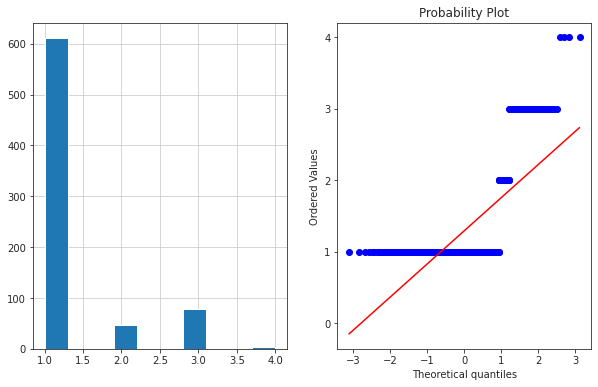

In [199]:
#We can check for skewness by using Distrution plot:
plot_data(df,'Age')

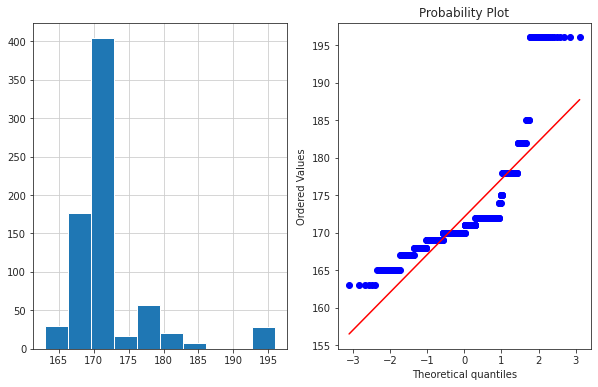

In [200]:
#We can check for skewness by using Distrution plot:
plot_data(df,'Social drinker')

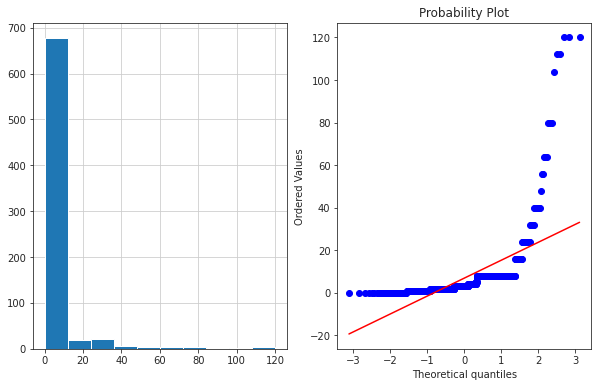

In [201]:
#We can check for skewness by using Distrution plot:
plot_data(df,'Pet')

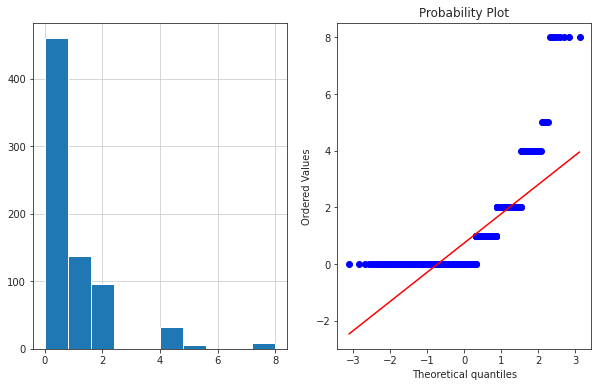

In [202]:
#We can check for skewness by using Distrution plot:
plot_data(df,'Education')

In [244]:
df_final.drop('Body mass index',axis=1,inplace=True)

In [245]:
#We can see that some of the features are not normally distributed skewness is present 
#for skewed Data Logarthim Tranformation works fine or we can also use Boxcox Method.
#If the skewness value is greater than 0.55 we consider that the feature is skewed.
for col in df.columns:
    if col!= 'Absenteeism time in hours':
        if df.skew().loc[col]>0.55:
            df[col] = np.log1p(df[col])

In [246]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop('Absenteeism time in hours',axis=1)
y = df_final['Absenteeism time in hours']
print('shape of X is {}'.format(X.shape))
print('shape of y is {}'.format(y.shape))

shape of X is (534, 21)
shape of y is (534,)


In [247]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [248]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [250]:
model = [LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(X_train,y_train)
    print("Score of",m, "is:",m.score(X_train,y_train))
    y_predict= m.predict(X_test)
    print("accuracy_score:",accuracy_score(y_test,y_predict))
    score = cross_val_score(m,X,y,cv=5,scoring='accuracy').mean()
    print("Cross validation is",np.mean(score)*100)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    print('******************************************************************')
    print('\n')

Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: 0.9976580796252927
accuracy_score: 0.9906542056074766
Cross validation is 75.83671310174572
[[30  1]
 [ 0 76]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.99      1.00      0.99        76

    accuracy                           0.99       107
   macro avg       0.99      0.98      0.99       107
weighted avg       0.99      0.99      0.99       107

[[30  1]
 [ 0 76]]
******************************************************************


Score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=

In [ ]:
#It looks like the Logistic Regression has a perfect F1 score on the test set, but keep in mind this is just a single training/test split; we need to confirm this performance holds for other splits. In addition, we need to tune the regularization hyperparameter. 
#Fortunately, there's a way to tackle both at the same time without introducing additional bias

In [251]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = [{'C': np.logspace(-3, 3, 10)}]
grid_search = GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),scoring='f1',n_jobs=-1)

In [252]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'C': 0.021544346900318832}

In [253]:
model = LogisticRegression(C=0.021544346900318832)
model.fit(X_train,y_train)
y_predict= model.predict(X_test)

In [254]:
scores = cross_val_score(model,X,y,cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0),scoring='f1',n_jobs=-1)

In [255]:
scores.mean()

0.8559378238917844

In [256]:
#Its our final model score performance:

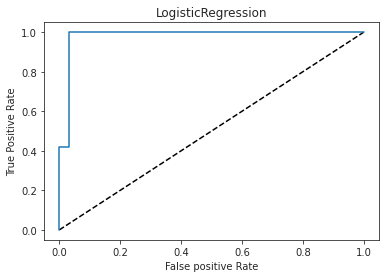

0.9838709677419355


In [258]:
#AUC and ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob = model.predict_proba(X_test)[:,1]
tpr,fpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label ='LogisticRegression')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression')
plt.show()

auc_score = roc_auc_score(y_test,y_predict)
print(auc_score)

In [259]:
#Saving the best Model:
import joblib
joblib.dump(model,'model.obj')
model_from_joblib = joblib.load('model.obj')
model_from_joblib.predict(X_test)

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
      dtype=uint8)